As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. Please choose just one of these potential targets for your minimum viable project.

## Business Understanding
The purpose of this project is to use data from DrivenData to forecast whether or not a person received the seasonal flu vaccination. The Kenyan Ministry of Health may more effectively target public health initiatives to boost vaccination rates and shield the populace from influenza by knowing the variables that affect vaccine uptake.




## Objectives
1. Our objective is to develop a predictive model to identify individuals who are likely to exhibit vaccine hesitancy.our goal is to provide insights that can inform targeted vaccination campaigns and interventions aimed at addressing vaccine hesitancy and increasing vaccine uptake rates.
2. identify common factors associated with increased uptake of vaccines. Understanding these factors can inform the development of targeted interventions and public health strategies aimed at promoting vaccination uptake and improving overall immunization rates 
3. Examine the influence of socio-economic factors, such as income and education, on vaccination decisions

# Import Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [41]:
train_features_df = pd.read_csv("Data/training_set_features.csv", index_col="respondent_id")

train_labels_df = pd.read_csv("Data/training_set_labels.csv",index_col="respondent_id")

test_validation_df = pd.read_csv("Data/test_set_features.csv",index_col="respondent_id")

In [42]:
# check first 5 rows of features_df
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
# check first 5 rows of labels_df
train_labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [44]:
# check first 5 rows of test_validation_df
test_validation_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [45]:
# Double-check that the rows between the features and the labels match up
np.testing.assert_array_equal(train_features_df.index.values, train_labels_df.index.values)

In [46]:
## Merge the features and labels data
merged_df = pd.concat([train_features_df, train_labels_df], axis =1)
merged_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

Additionally the datatypes consist of 23 columns of float type, 2 interger(int64) columns and 12 columns of object datatype.

In [48]:
merged_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## *Inference*

- **Target Variable**
  - `h1n1_vaccine`: The sample popluation show that 21.24% received the vacccine, therefore 78.76% during the 
     survey year (2009)

## Check for Class Imbalance

In [49]:
merged_df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Presence of class imbalance

In [50]:
# For the seasonal_vaccine category
merged_df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64



For seasonal_vaccine it looks good in terms of class disribution

## Data Cleaning and preparation

In [51]:
merged_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [52]:
## In terms of percentage
merged_df.isna().mean() * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

#### Another way to check percentage of missing values

In [53]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [54]:
missing_data = missing_values(merged_df)
missing_data

,index,Missing Values,Percentage
0,employment_occupation,13470,0.504362
1,employment_industry,13330,0.499120
2,health_insurance,12274,0.459580
3,income_poverty,4423,0.165612
4,doctor_recc_seasonal,2160,0.080878
5,doctor_recc_h1n1,2160,0.080878
6,rent_or_own,2042,0.076459
7,employment_status,1463,0.054780
8,marital_status,1408,0.052720
9,education,1407,0.052683


- We will use 40% as the threshold for null frequency in the columns to decide whether to consider the column for analysis or not.

- Sometimes columns with greater null percentage have more semantic meaning and thus they cannot be ignored.

- Here we can see `health_insurance`, `employment_industry` and `employment_occupation` columns with approximately **46%, 50% and 50%** missing values percentages respectively, and thus they cannot be used for analysis as nearly half of the data is missing in those columns.

In [55]:
# Drop columns with high missing values percentages
merged_df.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], inplace=True)

In [56]:
# For categorigal data, impute missing with mode
for column in ['age_group','education','race','sex','income_poverty','marital_status', 
               'rent_or_own','employment_status','hhs_geo_region','census_msa']:
    merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)

In [57]:
# For numeric data, impute with median
impute=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance',
        'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
        'behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1'
        ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker',
        'opinion_h1n1_vacc_effective'
        ,'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective',
        'opinion_seas_risk','opinion_seas_sick_from_vacc',
        'household_adults','household_children','h1n1_vaccine','seasonal_vaccine']

for i in impute:
    merged_df[i].fillna(merged_df[i].median(),inplace=True)

In [58]:
merged_df.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [59]:
# Check for duplicates
merged_df.duplicated().sum()

1

There was no presence of duplicates in the dataset.

In [60]:
merged_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [61]:
# Drop columns with seasonal information
merged_df.drop(columns=['doctor_recc_seasonal','opinion_seas_vacc_effective',  'opinion_seas_risk',
                        'opinion_seas_sick_from_vacc', 'seasonal_vaccine'
                       ], inplace = True)

In [62]:
merged_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine'],
      dtype='object')

## Exploratory Data Analysis

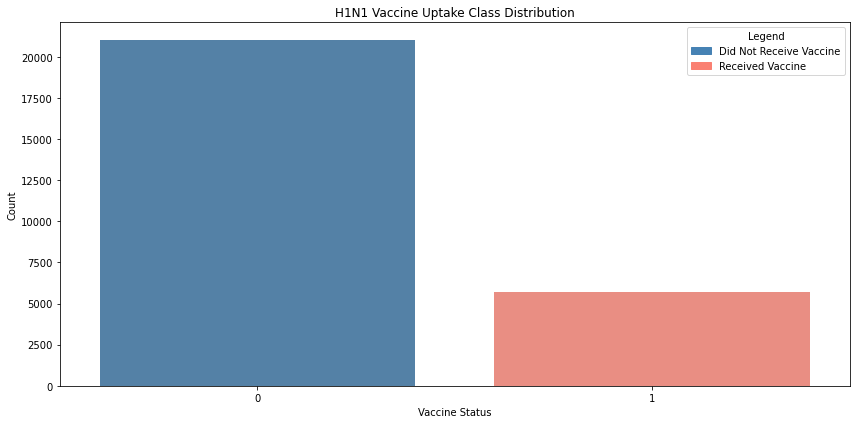

In [63]:
# Checking for class distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='h1n1_vaccine', data=merged_df, ax=ax, palette=["steelblue", "salmon"])

ax.set_title('H1N1 Vaccine Uptake Class Distribution')
ax.set_xlabel('Vaccine Status')
ax.set_ylabel('Count')

# Add separate legend labels for each class
legend_labels = ['Did Not Receive Vaccine', "Received Vaccine"]
colors = ["steelblue", "salmon"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels, title='Legend')

plt.tight_layout()
plt.savefig('Visualization1')

## Feature Engineering

### i) `behavior_score`

- Create a variable that represents how much an individual has done behaviorally to avoid the flu, aside from getting vaccinated, by summing up all behavioral variables. These are all binary columns with **1** representing **YES**, meaning the person has engaged in a behavior that reduces the risk of contracting the flu. By taking the sum across these columns, a higher score represents a more cautious, flu-conscious individual.

In [64]:
# Get the columns with `behavior` attributes
behavior_cols = [col for col in merged_df.columns if 'behavioral' in col]
behavior_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [65]:
# Create the `behavior_score` variable
merged_df['behavior_score'] = merged_df[behavior_cols].sum(axis=1)

In [66]:
# Check the count
merged_df[['behavior_score']].value_counts()

behavior_score
3.0               7331
2.0               4568
5.0               4546
4.0               4335
1.0               2656
0.0               2060
6.0               1040
7.0                171
dtype: int64

In [67]:
# Plot the distribution
import plotly.express as px
# Plot the distribution

# Get the value counts of 'behavior_score'
value_counts = merged_df['behavior_score'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values)

# Set labels and title
fig.update_layout(
    xaxis_title='Behavior Score',
    yaxis_title='Frequency',
    title='Bar plot of Behavior Scores'
)

# Show the plot

# Modeling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [79]:
def logistic_function (x):
    return 1 / (1 + np.exp (-x))

In [82]:
logistic_function (0)

0.5

In [76]:
x_train, x_test, y_train , y_test=train_test_split(train_labels_df,train_features_df, test_size=.25, random_state=88)

In [86]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data = {
    'age': [25, 32, 40, 55, 62, 28, 38, 45, 50, 68],
    'has_health_insurance': [True, True, True, True, False, True, True, False, True, False],
    'is_healthy': [True, False, True, True, False, True, False, True, True, False],
    'got_flu_vaccine': [True, False, True, True, False, False, True, False, True, False]
}

df = pd.DataFrame(data)

# Convert categorical features to numerical
df['has_health_insurance'] = df['has_health_insurance'].astype(int)
df['is_healthy'] = df['is_healthy'].astype(int)

# Split data into features and target variable
X = df[['age', 'has_health_insurance', 'is_healthy']]
y = df['got_flu_vaccine']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model coefficients
print("Model coefficients:")
print(model.coef_)

# Print the model intercept
print("Model intercept:")
print(model.intercept_)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Model coefficients:
[[-0.04008405  0.79440453  0.04614741]]
Model intercept:
[1.263008]
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
